In [38]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [40]:
sobel_x= np.array([[3, 0, -3], [10, 0, -10], [3, 0, -3]])
sobel_y=np.array([[3, 10, 3], [0, 0, 0], [-3, -10, -3]])
scharr_x= np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
scharr_y=np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
gausian=np.array([[1/16,1/8,1/16],[1/8,1/4,1/8],[1/16,1/8,1/16]])

In [101]:
def convolved_layer(filter,np_img):
    m,n=np_img.shape
    
    new=np.zeros(shape=(m,n))
    for i in range(1,m-1):
        for j in range(1,n-1):
            new[i-1,j-1]=np.sum(np.multiply(filter,np_img[i-1:i+2,j-1:j+2]))
            
    return new

In [102]:
def convolved(np_img): 
    m,n=np_img.shape
    x= np.zeros(shape=(m+2,n+2))
    x[1:m+1,1:n+1]=np_img
    np_img=x.copy()
    
    sobelx=convolved_layer(sobel_x,np_img)
    sobely=convolved_layer(sobel_y,np_img)
    scharrx=convolved_layer(scharr_x,np_img)
    scharry=convolved_layer(scharr_y,np_img)
    
    sobel=np.sqrt(np.square(sobelx)+np.square(sobely))
    scharr=np.sqrt(np.square(scharrx)+np.square(scharry))
    return sobel,scharr

In [119]:
def plot_no_gauss(sobel,scharr):

    plt.figure(figsize=(20,20))
    plt.subplot(1,3,3)
    plt.imshow(sobel,cmap='gray')
    plt.axis('off')
    plt.title('Edge detection using Sobel',size=15)
    plt.subplot(1,3,2)
    plt.imshow(scharr,cmap='gray')
    plt.axis('off')
    plt.title('Edge detection using Scharr',size=15)
    plt.subplot(1,3,1)
    plt.imshow(image_loaded,cmap='gray')
    plt.axis('off')
    plt.title('Grayscale Image',size=15)
    plt.show()

In [120]:
def plot_with_gauss(sobel_gauss,scharr_gauss):
    plt.figure(figsize=(20,20))
    plt.subplot(1,3,1)
    plt.imshow(image_loaded,cmap='gray')
    plt.axis('off')
    plt.title('Grayscale Image',size=15)
    plt.subplot(1,3,2)
    plt.imshow(sobel_gauss,cmap='gray')
    plt.axis('off')
    plt.title('Edge detection using Gaussian Blur and Sobel',size=15)
    plt.subplot(1,3,3)
    plt.imshow(scharr_gauss,cmap='gray')
    plt.axis('off')
    plt.title('Edge detection using Gaussian Blur and SCharr',size=15)
    plt.show()

In [121]:
def edge_detection(image_loaded):
    sobel,scharr=convolved(np.array(image_loaded))
    gauss=convolved_layer(gausian,np.array(image_loaded))
    sobel_gauss,scharr_gauss=convolved(gauss)
    plot_no_gauss(sobel,scharr)
    plot_with_gauss(sobel_gauss,scharr_gauss)

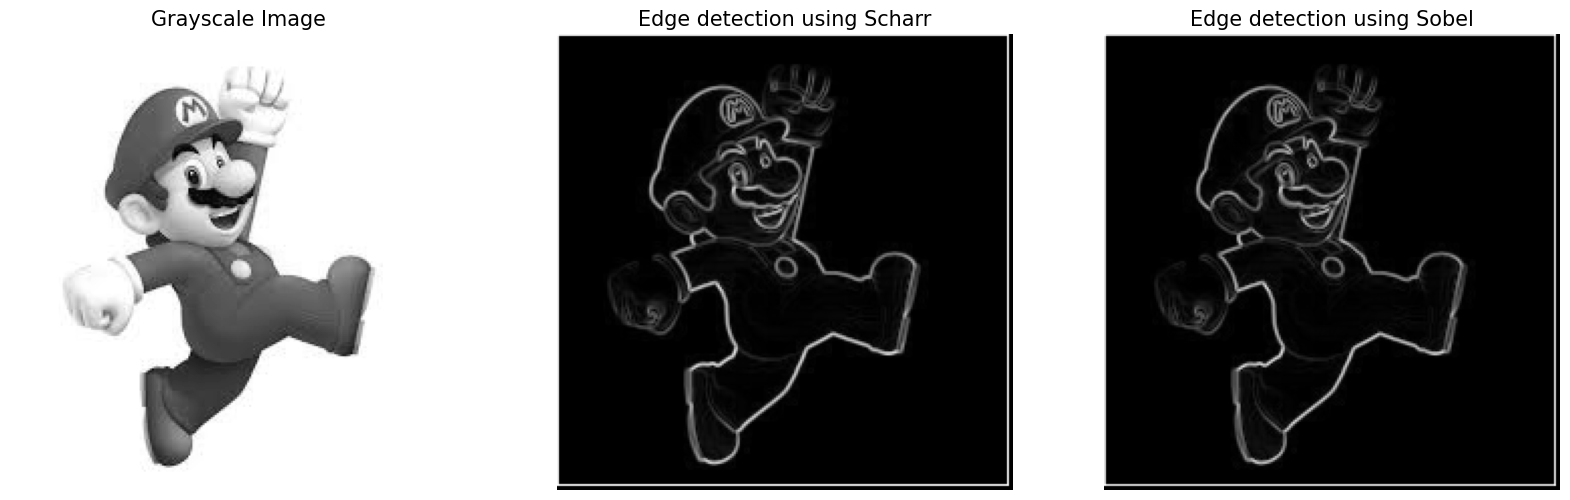

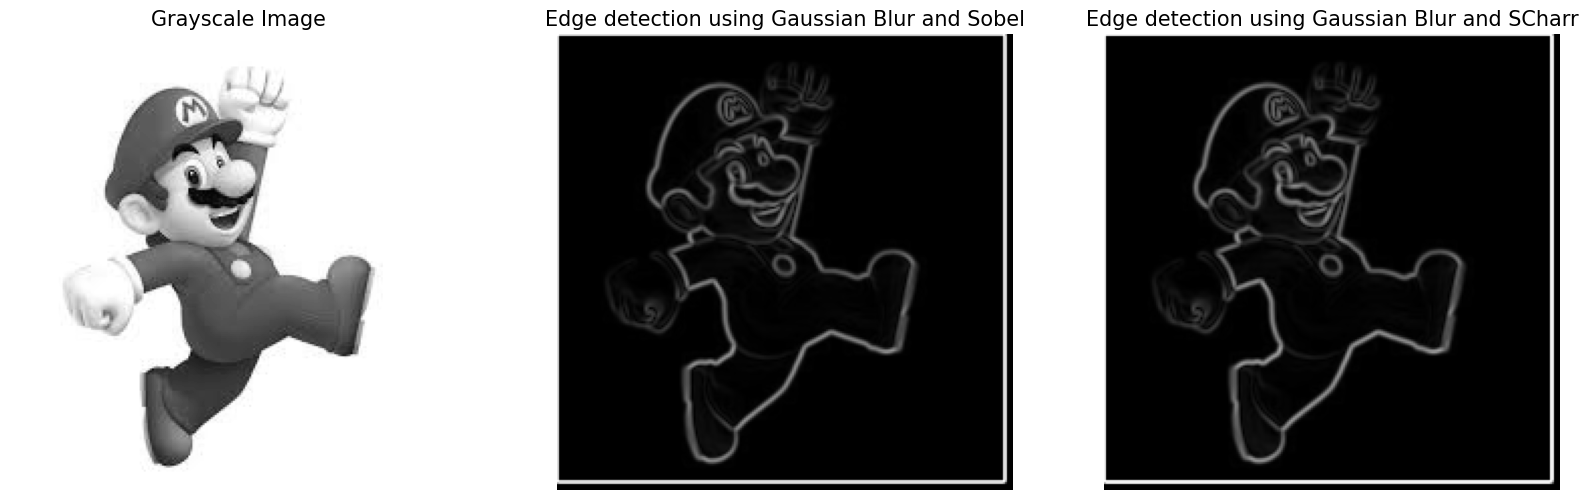

In [122]:
image_loaded = tf.keras.utils.load_img('download_2.jpeg',color_mode='grayscale') 
edge_detection(image_loaded)